<a href="https://colab.research.google.com/github/Anonymity-0/MyDeepLearning/blob/main/demo/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%92%8CAlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 卷积神经网络基础知识

In [ ]:
#基础
import torch

in_channels,out_channels=5,10#输入输出通道
width,height = 100,100 #图像大小
kernel_size =3 #卷积核大小 3*3 奇数
batch_size = 1

input = torch.randn(batch_size,
                    in_channels,
                    width,
                    height)
conv_layer = torch.nn.Conv2d(in_channels,
                             out_channels,
                             kernel_size = kernel_size)
output = conv_layer(input)

print(input.shape)
print(output.shape)
print(conv_layer.weight.shape)

torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 98, 98])
torch.Size([10, 5, 3, 3])


In [ ]:
#padding增加空白
import torch
input = [3,4,6,5,7,
         2,4,6,8,2,
         1,6,7,8,4,
         9,7,4,6,2,
         3,7,5,4,1]
input = torch.Tensor(input).view(1,1,5,5)

conv_layer = torch.nn.Conv2d(1,1,kernel_size = 3,padding=1,bias=False)

kernel = torch.Tensor([1,2,3,4,5,6,7,8,9]).view(1,1,3,3)
conv_layer.weight.data = kernel.data

output = conv_layer(input)
output

tensor([[[[ 91., 168., 224., 215., 127.],
          [114., 211., 295., 262., 149.],
          [192., 259., 282., 214., 122.],
          [194., 251., 253., 169.,  86.],
          [ 96., 112., 110.,  68.,  31.]]]], grad_fn=<ConvolutionBackward0>)

In [ ]:
import torch
class Net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = torch.nn.Conv2d(10,20,kernel_size = 5)
    self.pooling = torch.nn.MaxPool2d(2)
    self.fc = torch.nn.Linear(320,10)
  def forward(self,x):
    batch_size = x.size(0)
    x = F.relu(self.pooling(self.conv1(x)))
    x = F.relu(self.pooling(self.conv2(x)))
    x = x.view(batch_size,-1)
    x = self.fc(x)
    return x
  
model = Net()
device = torch.device('cuda:0'if torch.cuda.is_available else 'cpu')
model.to(device)

反向传播：
若使用整个样本集进行求解，损失梯度指向全局最优方向
若使用分批次样本进行求解，损失梯度指向当前批次最优方向

优化器
SDG 优化器：易受样本影响，容易陷入局部最优最优
SGD+Momentum ：引如动量
Adagard：自适应学习率
RMSProp优化器
Adam优化器

卷积层

目的：进行图像特征提取
特性：1. 拥有矩阵感知机制
     2. 权值共享

注意：1. 卷积核的通道数与输入层的通道数相同相同
     2. 输出的特征矩阵的通道数与卷积核个数相同

加上bias偏移量

加上激活函数
sigmoid：容易出现梯度消失
relu：反向传播无法更新权重，进入失活状态


经过卷积后的矩阵尺寸大小计算公式为：
w*w:输入图像大小
f*f：卷积核大小
s：stride大小，步长
p：padding像素pp
大小=**（w-f+2p)/s+1**


池化层
目的：对特征图进行稀疏处理，减少数据量减少数据量
特点：没有训练参数，只改变特征矩阵的w和h，不改变通道数，一般池化核大小poolsize和stride相同
MaxPooling：取最大
AveragePooling下采样层：取平均

In [ ]:
#pytorch demo
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))    # input(3, 32, 32) output(16, 28, 28)
        x = self.pool1(x)            # output(16, 14, 14)
        x = F.relu(self.conv2(x))    # output(32, 10, 10)
        x = self.pool2(x)            # output(32, 5, 5)
        x = x.view(-1, 32*5*5)       # output(32*5*5)
        x = F.relu(self.fc1(x))      # output(120)
        x = F.relu(self.fc2(x))      # output(84)
        x = self.fc3(x)              # output(10)
        return x
import torch
input1 = torch.rand([32,3,32,32])
model = LeNet()
print(model)


LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
tensor([[-4.9979e-02,  5.5164e-02, -9.4841e-02,  2.6303e-02, -1.3030e-01,
          1.9629e-03, -8.2660e-02, -1.3710e-01,  9.4397e-02, -1.1182e-01],
        [-6.1703e-02,  5.6397e-02, -9.2605e-02,  2.0546e-02, -1.2818e-01,
         -4.0239e-03, -7.6439e-02, -1.3637e-01,  9.9505e-02, -1.1152e-01],
        [-5.4078e-02,  5.4847e-02, -8.9639e-02,  3.1151e-02, -1.2723e-01,
          1.5128e-03, -8.3293e-02, -1.3883e-01,  1.0181e-01, -1.0369e-01],
        [-5.2753e-02,  5.2929e-02, -9.4860e-02,  2.0778e-02, -1.2328

Conv2d类
构造函数：输入通道数，输出通道数/卷积核数量，卷积核大小


In [ ]:
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
def train():
  transform = transforms.Compose(
      #将h*w*c的ndarray转化为C*H*W的tensor
      [transforms.ToTensor(),
       #标准化使用均值和标准差标准化
       transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
  )
  trainset = torchvision.datasets.CIFAR10(root='./data',
                                          train = True,
                                          download = False,
                                          transform = transform)
  trainloader = torch.utils.data.DataLoader(trainset,batch_size=36,
                                            shuffle = True,num_workers = 2)
  
  testset = torchvision.datasets.CIFAR10(root='./data',
                                         train = False,
                                         transform=transform,
                                         download = False)
  testloader = torch.utils.data.DataLoader(testset,batch_size=4,
                                           shuffle = False,
                                           num_workers = 0)
  test_data_iter=iter(testloader)#转化成迭代器
  test_image,test_label = next(test_data_iter)
  classes = ('plane','car','bird','cat','deer','dog',
             'frog','horse','ship','truck')
def imshow(img):
  img =img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
train()


# AlexNet网络

过拟合：根本原因是特征为度过多，模型假设过于复杂，参数过多，训练数据过少，导致拟合的函数完美的预测训练集，但对新数据的测试集预测结果差。过度的拟合了训练数据，没有考虑到泛化能力

dropout
使用dropout的方式中网络正向传播过程中随机失活一部分神经元

conv1:
*   卷积层个数：96
*   卷积层大小11*11
*   pading：[1,2]
*   stride:4
* input_size:[224,224,3]
* output_size:[55,55,96]
* N = (224-11+1+2)/4+1=96

Maxpool1:
* kernel_size:3
* pading:0
* stride:2

Conv2:
* 卷积核个数：256
* 卷积核大小：5
* padding:[2,2]
* stride :1
* input_size:[27,27,96]
* output_size:[27,27,256]
* N = (27-5+2+2)/1+1=27


Maxpool2:
* kernel_size:3
* pading:0
* stride:2
* input_size:[27,27,256]
* output_size:[13,13,256]

Conv3:
* 卷积核个数：384
* 卷积核大小：3
* padding:[1,1]
* stride :1
* input_size:[13,13,256]
* output_size:[13,13,384]
* N = (13-3+1+1)/1+1=13


Conv4:
* 卷积核个数：384
* 卷积核大小：3
* padding:[1,1]
* stride :1
* input_size:[13,13,384]
* output_size:[13,13,384]
* N = (13-3+1+1)/1+1=13

Conv5:
* 卷积核个数：256
* 卷积核大小：3
* padding:[1,1]
* stride :1
* input_size:[13,13,384]
* output_size:[13,13,256]
* N = (13-3+1+1)/1+1=


Maxpool3:
* kernel_size:3
* pading:0
* stride:2
* input_size:[13,13,256]
* output_size:[6,6,256]


In [1]:
#下载数据集
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-03-16 07:14:45--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  16.1MB/s    in 16s     

2023-03-16 07:15:01 (14.1 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [2]:
#解压数据集
!tar xvf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [3]:
#划分数据集
import os
from shutil import copy, rmtree
import random


def mk_file(file_path: str):
    if os.path.exists(file_path):
        # 如果文件夹存在，则先删除原文件夹在重新创建
        rmtree(file_path)
    os.makedirs(file_path)


def main():
    # 保证随机可复现
    random.seed(0)

    # 将数据集中10%的数据划分到验证集中
    split_rate = 0.1

    # 指向你解压后的flower_photos文件夹
    cwd = os.getcwd()
    origin_flower_path = os.path.join(cwd, "flower_photos")
    assert os.path.exists(origin_flower_path), "path '{}' does not exist.".format(origin_flower_path)

    flower_class = [cla for cla in os.listdir(origin_flower_path)
                    if os.path.isdir(os.path.join(origin_flower_path, cla))]

    # 建立保存训练集的文件夹
    train_root = os.path.join(cwd, "flower_data/train")
    mk_file(train_root)
    for cla in flower_class:
        # 建立每个类别对应的文件夹
        mk_file(os.path.join(train_root, cla))

    # 建立保存验证集的文件夹
    val_root = os.path.join(cwd, "flower_data/val")
    mk_file(val_root)
    for cla in flower_class:
        # 建立每个类别对应的文件夹
        mk_file(os.path.join(val_root, cla))

    for cla in flower_class:
        cla_path = os.path.join(origin_flower_path, cla)
        images = os.listdir(cla_path)
        num = len(images)
        # 随机采样验证集的索引
        eval_index = random.sample(images, k=int(num*split_rate))
        for index, image in enumerate(images):
            if image in eval_index:
                # 将分配至验证集中的文件复制到相应目录
                image_path = os.path.join(cla_path, image)
                new_path = os.path.join(val_root, cla)
                copy(image_path, new_path)
            else:
                # 将分配至训练集中的文件复制到相应目录
                image_path = os.path.join(cla_path, image)
                new_path = os.path.join(train_root, cla)
                copy(image_path, new_path)
            print("\r[{}] processing [{}/{}]".format(cla, index+1, num), end="")  # processing bar
        print()

    print("processing done!")


if __name__ == '__main__':
    main()

[sunflowers] processing [699/699]
[daisy] processing [633/633]
[dandelion] processing [898/898]
[roses] processing [641/641]
[tulips] processing [799/799]
processing done!


搭建AlexNet并训练

In [17]:
#放入model.py
import torch.nn as nn
import torch
class AlexNet(nn.Module):
  def __init__(self,num_classes=1000,init_weights=False):
    super(AlexNet, self).__init__()
    #使用Sequential打包提取特征
    self.features = nn.Sequential(
        #padding可以传入int或者tuple
        nn.Conv2d(3,48,kernel_size=11,stride=4,padding=2),#input[3,224,224] output[48,55,55]
        #（224-11+2*2）/4+1=55.25，pytorch会向下取整
        nn.ReLU(inplace=True),#增加计算量，减少内存
        nn.MaxPool2d(kernel_size=3,stride=2),#池化层 input[48,55,55] output [48,27,27]
        nn.Conv2d(48,128,kernel_size=5,padding=2),#input[48,27,27] output [128,13,13]
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(128,192,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(192,192,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(192,128,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2),
    )
    self.classifier = nn.Sequential(
        #以百分之五十点几率随机失活
        nn.Dropout(p=0.5),
        nn.Linear(128*6*6,2048),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),
        nn.Linear(2048,2048),
        nn.ReLU(inplace =True),
        nn.Linear(2048,num_classes),
    )
    if init_weights:
      self._initalize_weights()
  def forward(self,x):
      x = self.features(x)
      #展平
      x = torch.flatten(x,start_dim=1)
      x = self.classifier(x)
      return x
    #初始化权重
  def _initalize_weights(self):
      #遍历每个层jiegou
      for m in self.modules():
        #如果是卷积层
        if isinstance(m,nn.Conv2d):
          nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
          #如果偏置不为空
          if m.bias is not None:
            nn.init.constant_(m.bias,0)
        #如果是全联接层
        elif isinstance(m,nn.Linear):
          nn.init.constant_(m.bias,0)
          nn.init.normal_(m.weight,0,0.01)

In [30]:
from typing_extensions import dataclass_transform
#train.py
import torch
import torch.nn as nn
from torchvision import transforms,datasets,utils
import torch.optim as optim
import os
#from model import AlexNet
import json
import time
import matplotlib.pyplot as plt
import numpy as np


#如果有gpu使用第一个gpu
device = torch.device('cuda:0'if torch.cuda.is_available() else 'cpu')
print(device)

data_transform = {
    'train':transforms.Compose([transforms.RandomResizedCrop(224),#随机裁剪
                               transforms.RandomHorizontalFlip(),#随机翻转
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]),
    'val':transforms.Compose([transforms.Resize((224,224)),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])}
data_root = os.path.abspath(os.path.join(os.getcwd(),'flower_data'))

train_dataset = datasets.ImageFolder(root = data_root+'/train',transform=data_transform['train'])
train_num = len(train_dataset)

#获取分类以及索引
flower_list = train_dataset.class_to_idx
cla_dic = dict((val,key)for key,val in flower_list.items())
#保存分类成json文件
json_str = json.dumps(cla_dic,indent=4)
with open('class_indices.json','w') as json_file:
  json_file.write(json_str)

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           num_workers = 0)
validate_dataset = datasets.ImageFolder(root = data_root+'/val',
                                        transform = data_transform['val'])
val_num = len(validate_dataset)
validate_loader = torch.utils.data.DataLoader(validate_dataset,
                                              batch_size= batch_size,
                                              shuffle = False,
                                              num_workers = 0
                                              )
test_data_iter = iter(validate_loader)
test_image,test_label = next(test_data_iter)

# def imshow(img):
#   img = img/2+0.5
#   npimg = img.numpy()
#   plt.imshow(np.transpose(npimg,(1,2,0)))
#   plt.show()

#imshow(utils.make_grid(test_image))


net = AlexNet(num_classes=5,init_weights=True)

net.to(device)
loss_function = nn.CrossEntropyLoss()

#优化器
optimizer = optim.Adam(net.parameters(),lr=0.0002)
save_path = 'AlexNet.pth'
#最佳准确率
best_acc = 0

for epoch in range(10):
  net.train()
  running_loss =0.0
  t1 = time.perf_counter()
  for step,data in enumerate(train_loader,start=0):
    images,labels = data
    optimizer.zero_grad()
    outputs = net(images.to(device))
    loss = loss_function(outputs,labels.to(device))
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()

    rate = (step+1)/len(train_loader)
    a = '*'*int(rate*50)
    b = '*'*int(1-rate)*50
    print('\r train loss: {:^3.0f}%[{}->{}]{:.3f}'.format(int(rate*100),a,b,loss),end='')
  print()
  print(time.perf_counter()-t1)    
  #validate
  net.eval()
  acc =0.0  
  with torch.no_grad():
    for data_test in validate_loader:
      test_images,test_labels = data_test
      outputs = net(test_images.to(device))
      predict_y = torch.max(outputs,dim=1)[1]
      acc += (predict_y==test_labels.to(device)).sum().item()
    accurate_test = acc / val_num
    if accurate_test > best_acc:
        best_acc=accurate_test
        torch.save(net.state_dict(),save_path)
    print('[epoch %d] train_loss %.3f test_accuracy: %.3f' % (epoch+1, running_loss/step, acc/val_num))
print('结束训练')


cuda:0
 train loss: 100%[**************************************************->]1.271
18.766869499000222
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([12])
[epoch 1] train_loss 1.380 test_accuracy: 0.453
 train loss: 100%[**************************************************->]1.063
18.993444200999875
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([12])
[epoch 2] train_loss 1.213 test_accuracy: 0.500
 train loss: 100%[**************************************************->]1.328
19.310002370999882
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([12

tulips 0.9740821123123169


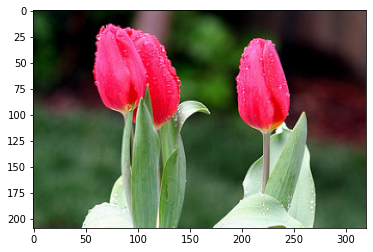

In [34]:
#train.py
import torch
#from model import AlexNet
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import json

data_transform = transforms.Compose(
    [
      transforms.Resize((224,224)),
      transforms.ToTensor(),
      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

img = Image.open('/content/flower_photos/tulips/100930342_92e8746431_n.jpg')
plt.imshow(img)

img = data_transform(img)
img = torch.unsqueeze(img,dim=0)

try:
  json_file= open('class_indices.json','r')
  class_indict = json.load(json_file)
except Exception as e:
  print(e)
  exit(-1)

model = AlexNet(num_classes=5)
model_weight_path = 'AlexNet.pth'
model.load_state_dict(torch.load(model_weight_path))
model.eval()
with torch.no_grad():
  output = torch.squeeze(model(img))
  predict = torch.softmax(output,dim=0)
  predict_cla = torch.argmax(predict).numpy()
print(class_indict[str(predict_cla)],predict[predict_cla].item())
